# Mental Health Prediction Using Machine Learning

The 2024 Kaggle Playground Series aims to provide engaging and practical datasets for machine learning enthusiasts to enhance their skills. This project focuses on Mental Health Prediction, using data from a mental health survey to analyze the factors that contribute to depression. The goal is to build a predictive model that determines whether an individual is experiencing depression based on various factors present in the dataset.

The dataset contains missing values, requiring preprocessing techniques such as data imputation and visualization for better insights. Various data analysis techniques, including count plots, pie charts, and heatmaps, will be used to understand the key contributing factors to depression.

## Project Objectives

The main objectives of this project are:

- Understand the Dataset – Perform an in-depth exploration of the provided training, testing, sample submission, and original data to gain insights into its structure and attributes.
- Handle Missing Values – Identify and impute missing values to ensure data quality and improve model performance.
- Data Visualization & Analysis – Generate multiple visualization plots (count plots, pie charts, heatmaps, etc.) to analyze key factors affecting mental health and depression.
- Model Implementation – Utilize the CatBoost model with optimized parameters to predict depression based on survey responses.
- Enhance Model Performance – Implement Repeated Stratified K-Fold Cross-Validation to refine predictions and improve the reliability of the model.
- Evaluate Results – Measure the model’s accuracy and effectiveness in classifying individuals with or without depression based on survey responses.

## Project Scope

<b>In-Scope:</b>

- Dataset Exploration – Understanding the data, missing values, and feature distributions.
- Data Preprocessing – Cleaning the dataset, handling missing values, and preparing it for modeling.
- Feature Engineering – Creating meaningful features from the dataset to enhance predictions.
- Data Visualization – Using plots and statistical analysis to explore depression risk factors.
- Model Selection & Implementation – Implementing different models for prediction.
- Performance Improvement – Using Repeated Stratified K-Fold for better accuracy. <b>MIGHT BE REVISED</B>
- Prediction & Insights – Determining whether a person is at risk of depression based on analyzed factors.

<b>Out-of-Scope:</b>

- Medical Diagnosis – The project does not provide a medical diagnosis but rather a statistical analysis and prediction.
- Real-time Monitoring – The model will not be deployed for real-time monitoring of mental health conditions.
- Therapeutic Interventions – The project does not propose medical or psychological treatment solutions.

## Data Source

The dataset used in this project originates from the 2024 Kaggle Playground Series (Season 4, Episode 11) competition, titled "<a href="https://www.kaggle.com/competitions/playground-series-s4e11/overview">Exploring Mental Health Data</a>". The data was derived from the <a href="https://www.kaggle.com/datasets/sumansharmadataworld/depression-surveydataset-for-analysis">Depression Survey/Dataset</a> and has been augmented with synthetic data to increase its size.

The dataset consists of 234,500 observations, with a 6:4 train-test split. It contains 20 features, each representing different attributes related to an individual's mental health and well-being. The target variable, "Depression," is a binary flag (0 or 1) indicating whether an individual is experiencing depression.

<b>Understanding the Features</b>

<table border="1">
  <tr>
    <th><b>Column Name</b></th>
    <th><b>Description</b></th>
  </tr>
  <tr>
    <td>ID</td>
    <td>Unique identifier for each participant in the dataset</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>Name of the participant</td>
  </tr>
  <tr>
    <td>Gender</td>
    <td>Gender of participant (listed as Male or Female)</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Age of the participant</td>
  </tr>
  <tr>
    <td>City</td>
    <td>The city that the participant resides</td>
  </tr>
  <tr>
    <td>Working Professional or Student</td>
    <td>Indicates whether the participant is a working professional or a student</td>
  </tr>
  <tr>
    <td>Profession</td>
    <td>Participant's profession or field of study</td>
  </tr>
  <tr>
    <td>Academic Pressure</td>
    <td>Level of pressure the participant's experiences in academics (on a scale of 1-5)</td>
  </tr>
  <tr>
    <td>Work Pressure</td>
    <td>Level of pressure the participant's experiences at their job (on a scale of 1-5)</td>
  </tr>
  <tr>
    <td>CGPA</td>
    <td>Cumulative Grade Point Average of the participant</td>
  </tr>
  <tr>
    <td>Study Satisfaction</td>
    <td>The participant's satisfaction with their studies (on a scale of 1-5)</td>
  </tr>
    </tr>
    <tr>
    <td>Job Satisfaction</td>
    <td>The participant's satisfaction with their jobs (on a scale of 1-5)</td>
  </tr>
  <tr>
    <td>Sleep Duration</td>
    <td>Average duration of sleep per night</td>
  </tr>
  <tr>
    <td>Dietary Habits</td>
    <td>Dietary habits of the participant (listed mainly as healthy, moderate and unhealthy)</td>
  </tr>
  <tr>
    <td>Degree</td>
    <td>Level of education the participant is pursuing or has completed</td>
  </tr>
  <tr>
    <td>Have you ever had suicidal thoughts?</td>
    <td>Indicates whether the participant has ever had suicidal thoughts (listed as yes or no)</td>
  </tr>
  <tr>
    <td>Work/Study Hours</td>
    <td>Number of hours the participant spends working or studying per day on average</td>
  </tr>
  <tr>
    <td>Financial Stress</td>
    <td>Level of financial stress the participant experiences (on a scale of 1-5)</td>
  </tr>
  <tr>
    <td>Family History of Mental Illness</td>
    <td>Indicates whether the participant has a family history of mental illness (listed as yes or no)</td>
  </tr>
  <tr>
    <td>Depression</td>
    <td>The participant's depression status (listed as 0 or 1)</td>
  </tr>
</table>


## Step 1. Environment Set-Up and Data Import

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data import
train = pd.read_csv("/workspaces/myfolder/MentalHealth_Workbench/data/train.csv")
test = pd.read_csv("/workspaces/myfolder/MentalHealth_Workbench/data/train.csv")

## Step 2. Exploratory Data Analysis

Exploratory data analysis (EDA) is crucial in data science projects because it helps us understand the structure and characteristics of the data we're working with. By exploring variables, identifying patterns, detecting anomalies, and visualizing relationships, EDA enables us to make informed decisions about data preprocessing, feature engineering, and model selection. It also plays a key role in uncovering insights and formulating hypotheses, laying the groundwork for more accurate modeling and impactful conclusions.

In [16]:
print("First 5 rows of dataset:")
train.head()

First 5 rows of dataset:


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [17]:
print(f"There are {train.shape[1]} columns and {train.shape[0]} rows in the train dataset.")

There are 20 columns and 140700 rows in the train dataset.


In [18]:
print("Column names and data type of each column:")
train.dtypes

Column names and data type of each column:


id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

Checking for missing values in each column:
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


<Axes: title={'center': 'Visualizing Missing Values'}>

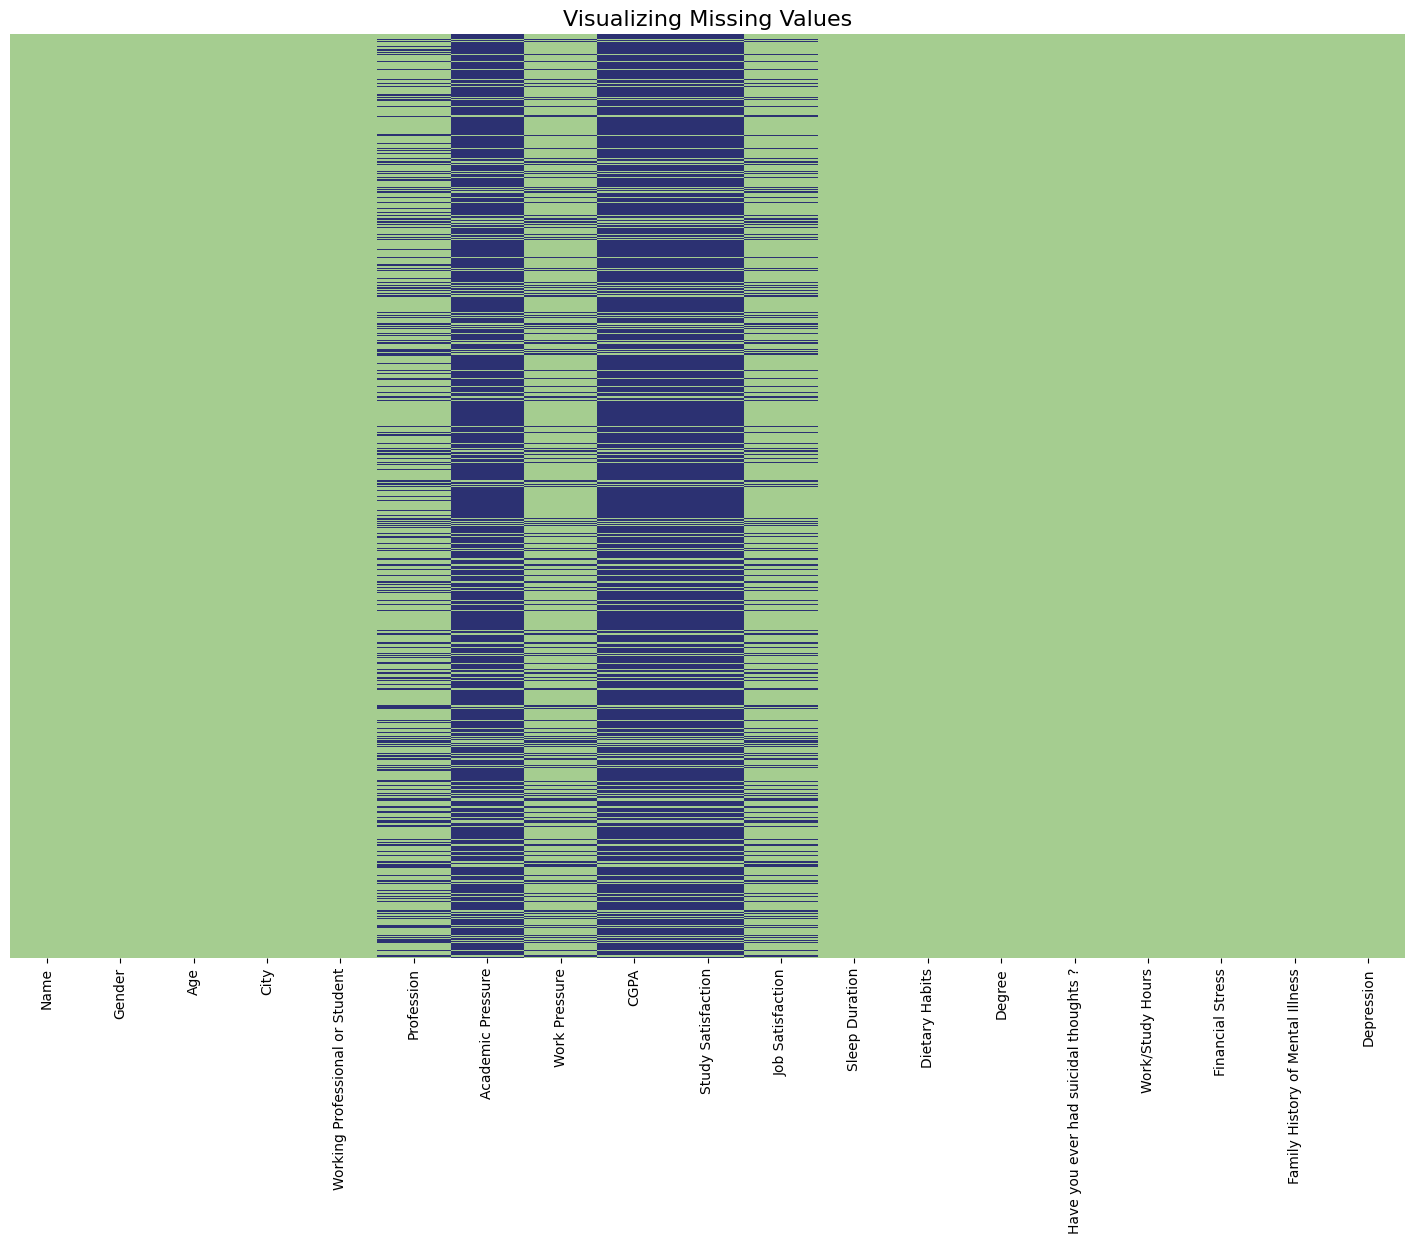

In [35]:
print("Checking for missing values in each column:")
print(train.isnull().sum())

plt.figure(figsize=(18,12))
plt.title("Visualizing Missing Values", fontsize=16)
sns.heatmap(train.isnull(), cmap="crest", cbar=False, yticklabels=False)

In [24]:
# Save 'id' column for submission
test_ids = test['id']

# Drop 'id' column in both datasets
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

# Define the target column
target_column = 'Depression'

# Select categorical and numerical columns (initial)
categorical_columns = train.select_dtypes(include=['object']).columns
numerical_columns = train.select_dtypes(exclude=['object']).columns.drop(target_column)

# Print out column information
print("Target Column:", target_column)
print("\nCategorical Columns:", categorical_columns.tolist())
print("\nNumerical Columns:", numerical_columns.tolist())

Target Column: Depression

Categorical Columns: ['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

Numerical Columns: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']


In [25]:
for column in categorical_columns:
    num_unique = train[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")

'Name' has 422 unique categories.
'Gender' has 2 unique categories.
'City' has 98 unique categories.
'Working Professional or Student' has 2 unique categories.
'Profession' has 64 unique categories.
'Sleep Duration' has 36 unique categories.
'Dietary Habits' has 23 unique categories.
'Degree' has 115 unique categories.
'Have you ever had suicidal thoughts ?' has 2 unique categories.
'Family History of Mental Illness' has 2 unique categories.


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


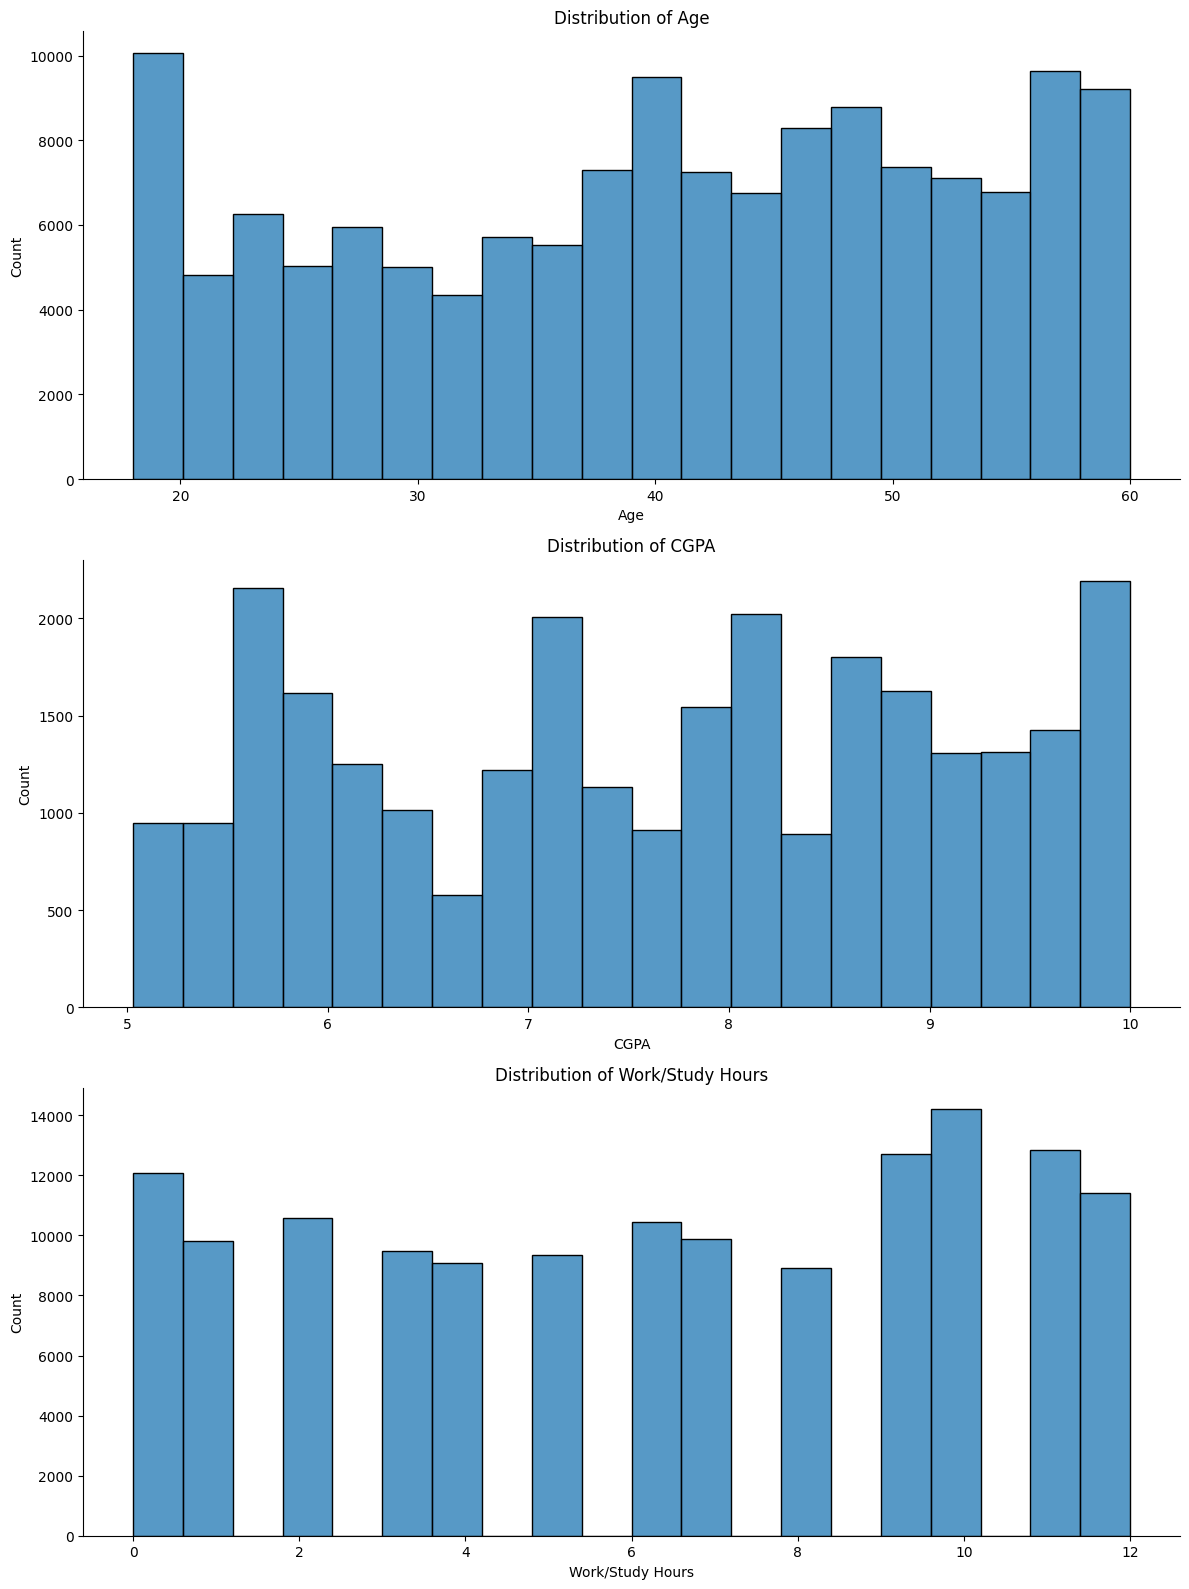

In [41]:
# Distribution of Numerical Variables
numerical_columns_to_plot = ["Age", "CGPA", "Work/Study Hours"]

plt.figure(figsize=(12, 16)) 

for i, column in enumerate(numerical_columns_to_plot):
    plt.subplot(3, 1, i+1)
    sns.histplot(data=train, x=column, kde=False, bins=20)
    plt.title(f'Distribution of {column}')
    sns.despine()

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

In [40]:
print("The skewness of columns:")
print(train[numerical_columns].skew())

The skewness of columns:
Age                  -0.217977
Academic Pressure    -0.133977
Work Pressure         0.018515
CGPA                 -0.073636
Study Satisfaction    0.011764
Job Satisfaction      0.054361
Work/Study Hours     -0.128169
Financial Stress      0.035603
dtype: float64


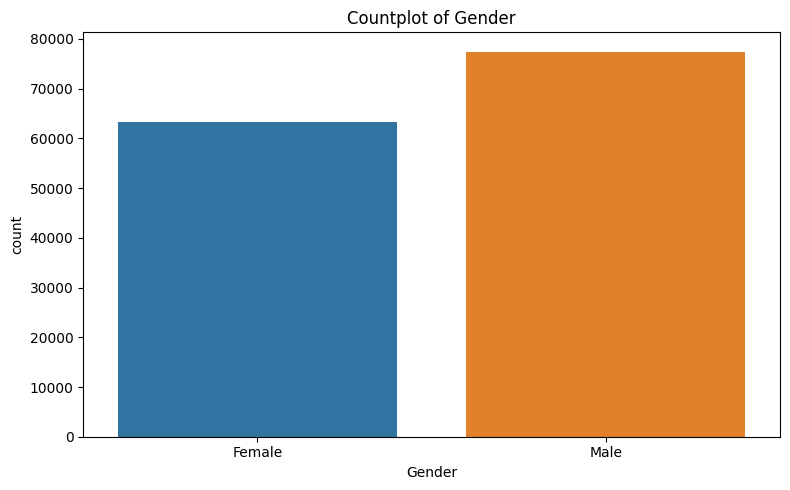

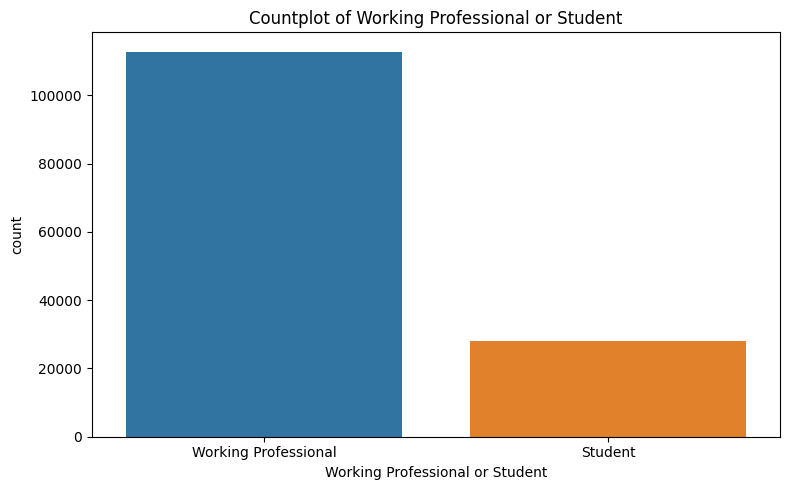

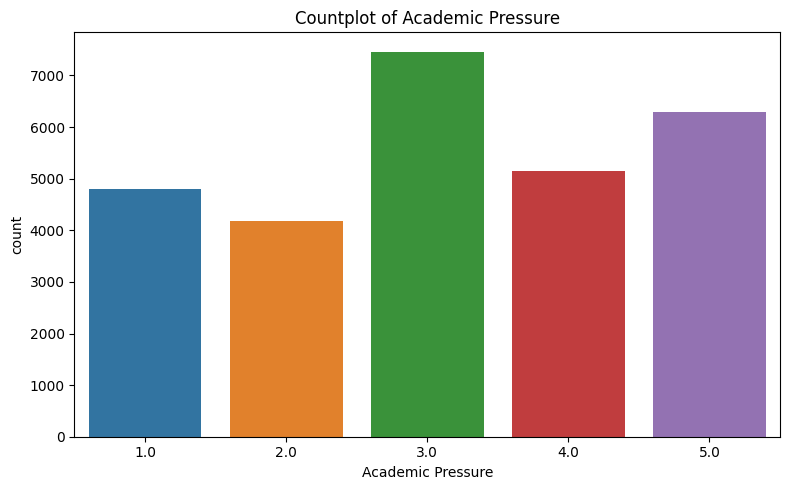

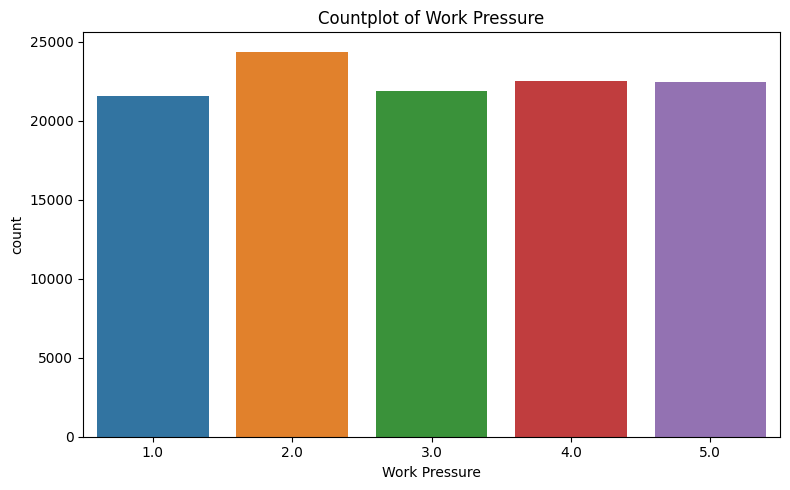

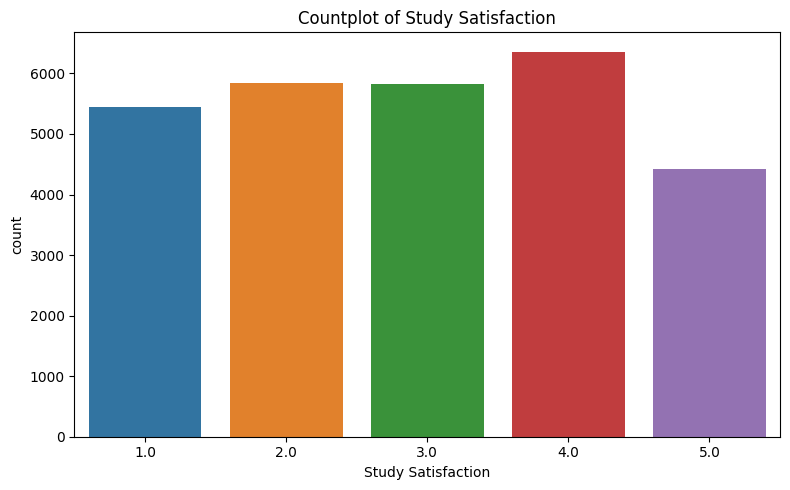

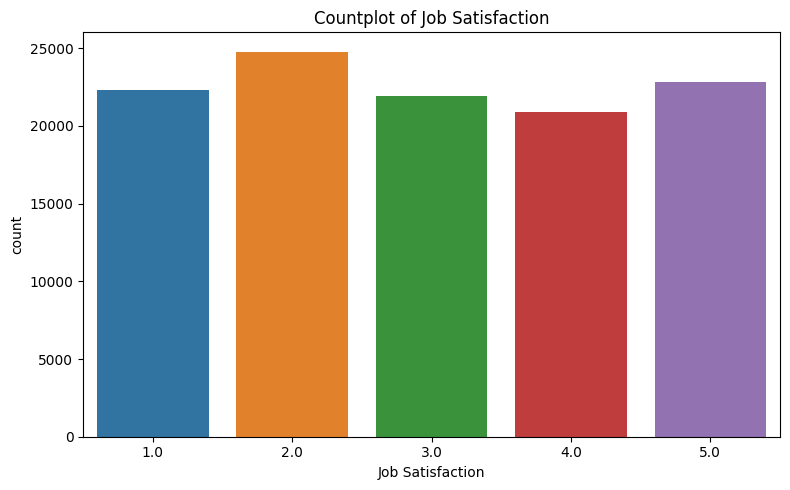

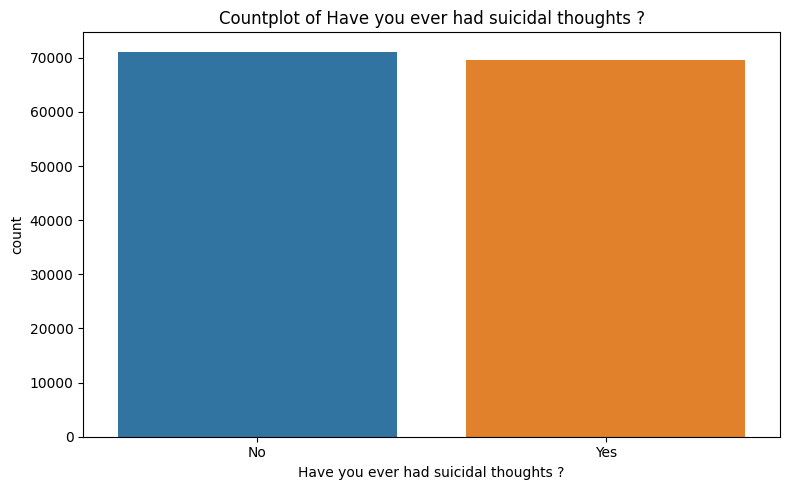

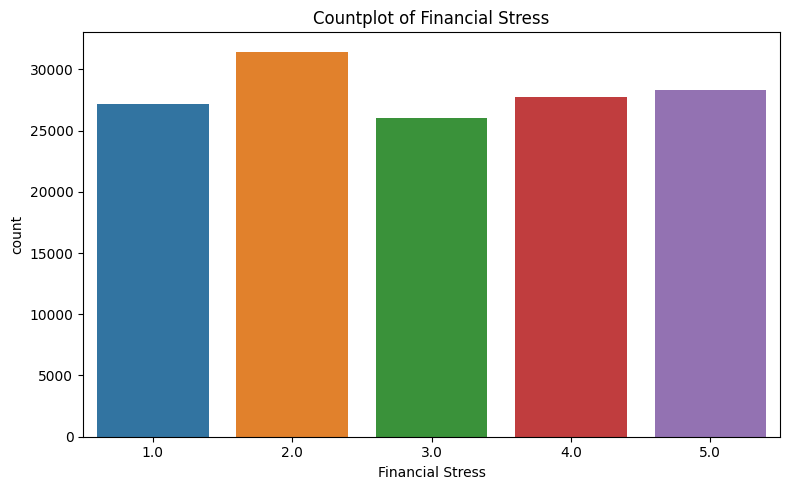

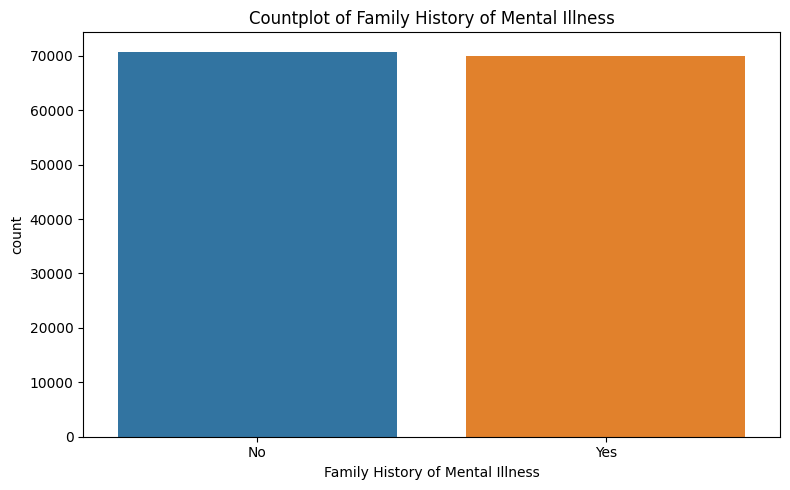

In [43]:
# Distribution of Categorical Features
categorical_columns_to_plot = ['Gender', 'Working Professional or Student', 'Academic Pressure', 
                       'Work Pressure', 'Study Satisfaction', 'Job Satisfaction',
                       'Have you ever had suicidal thoughts ?', 'Financial Stress', 
                       'Family History of Mental Illness']

# Plot countplots for each categorical column
for column in categorical_columns_to_plot:
    
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train, x=column)
    plt.title(f'Countplot of {column}')
    
    plt.tight_layout()
    plt.show()

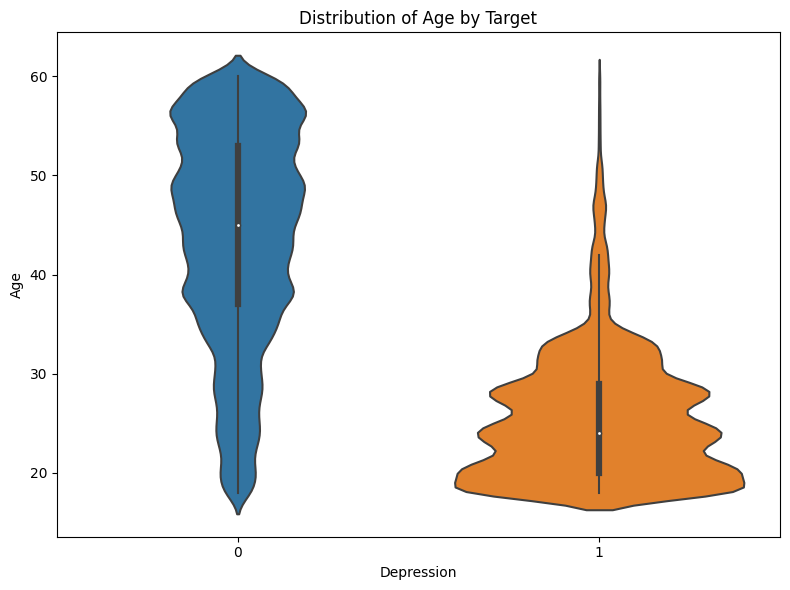

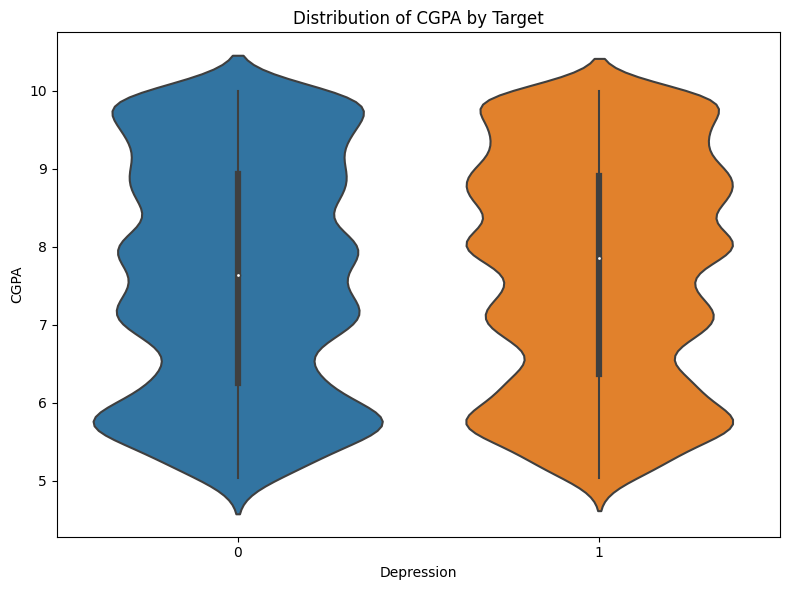

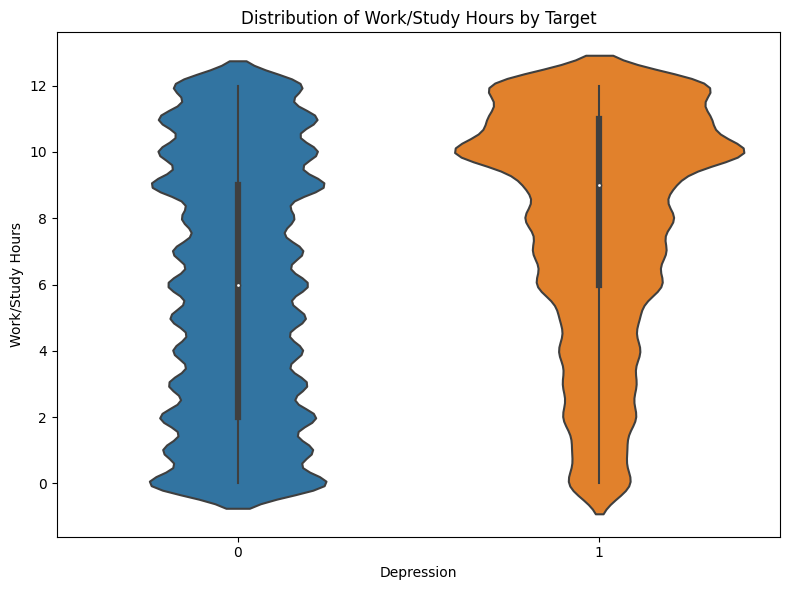

In [45]:
# Distribution of Numerical Features by Presence of Depression
for column in numerical_columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=train, x=target_column, y=column) 
    plt.title(f'Distribution of {column} by Target')

    plt.tight_layout()
    plt.show()

In [46]:
# Calculate the correlation matrix
correlation_matrix = train.corr(numeric_only=True)

# Create an interactive heatmap with orange and blue colors
fig = px.imshow(correlation_matrix, 
                text_auto=True,  # Display correlation values
                color_continuous_scale='RdYlBu',  # Color scale with shades of red, yellow, and blue
                title='Heatmap of Correlation Matrix',
                aspect='auto')

# Show the plot
fig.show()

NameError: name 'px' is not defined

## Step 3. Data Transformation/Wrangling

Data wrangling is essential in the model creation cycle as it ensures data quality, prepares data for modeling techniques, uncovers insights, and supports reproducibility. It forms the foundation upon which accurate, reliable, and actionable models can be derived from data in the field of data science. These steps are done based on what our exploratory data analysis (EDA) uncovered. In this case, we will be imputing our missing variables, encoding our categorical variables, and splitting our dataset for testing and training.

## Step 4: Modelling

Modeling in the data science process involves the application of machine learning algorithms to analyze data, make predictions, or uncover patterns. It is a pivotal phase where the insights gleaned from data are translated into actionable decisions and solutions.

Machine learning models are employed to address various tasks, such as classification, regression, clustering, and recommendation systems, depending on the nature of the problem at hand. These models learn from historical data to generalize patterns and make predictions on new, unseen data.

## Step 5: Model Tuning

## Step 6: Model Evaluation and Selection

Model evaluation and comparison are indispensable in the data science process as they validate the effectiveness and reliability of predictive models. By systematically evaluating models against relevant metrics such as accuracy, precision, recall, and F1-score, data scientists can assess which models perform best for specific tasks and datasets. This process not only ensures the chosen model meets desired performance criteria but also identifies potential weaknesses or biases that could impact its real-world application. Moreover, comparing different models allows data scientists to make informed decisions, selecting the most suitable model that balances accuracy, interpretability, and computational efficiency.

## Step 7: Model Registration and Deployment

Models built on Workbench, whether they are scikit-learn models or SAS Viya ML models can be registered into the model repository on Viya (SAS Model Manager). This is a crucial step in ensuring that models can be goverened properly as corporate assets before being pushed into production.

Let's look at examples of how to register a SAS Viya ML model.

## Future Work